### モデルを作ってシミュレーションを実行する
[JModelica Users Guid - Version 2.10](https://jmodelica.org/downloads/UsersGuide-2.10.pdf) の 5.2. A first example に簡単なモデルを作ってシミュレーションを実行し、結果をプロットする方法が書かれています。 これを実行してみます。

Van der Pol oscillator の支配方程式を次に示します。
$$
\frac{d^2 x}{dt^2} - \mu (1-x^2) \frac{d x}{d t} + x = 0
$$
$x=x_2, \frac{dx}{dt} = x_1, \mu = 1$ とおくと次のように変形できます。
$$
\frac{d x_1}{d t} = (1-x_2^2) x_1 - x_2, \  \frac{d x_2}{dt} = x_1
$$
これは、ここで解く方程式 
$$
\frac{d x_1}{d t} = (1-x_2^2) x_1 - x_2 + u, \  \frac{d x_2}{dt} = x_1
$$
の制御信号(control signal) を$u=0$としたものになります。初期条件を
$$
x_1(0)=0, \  x_2(0)=1
$$
とします。

モデルのソースコードを作成します。短いソースコードのモデルは Jupyter Notebook の Magicコマンド %%writefile で作成できます。

In [1]:
%%writefile VDP.mo
model VDP
    // State start values
    parameter Real x1_0 = 0;
    parameter Real x2_0 = 1;
    
    // The states
    Real x1(start = x1_0);
    Real x2(start = x2_0);
    
    // The control signal
    input Real u;
    
equation
    der(x1) = (1 - x2^2) * x1 - x2 + u;
    der(x2) = x1;
end VDP;

Overwriting VDP.mo


モデルをコンパイルして FMU を作成してロードします。

In [2]:
# Import the function for compilation of models and the load_fmu method
from pymodelica import compile_fmu
from pyfmi import load_fmu
# Compile model
fmu_name = compile_fmu("VDP","VDP.mo")
# Load model
vdp = load_fmu(fmu_name)

シミュレーションを実行します。

In [3]:
res = vdp.simulate(final_time=10)

Final Run Statistics: --- 

 Number of steps                                 : 148
 Number of function evaluations                  : 208
 Number of Jacobian evaluations                  : 3
 Number of function eval. due to Jacobian eval.  : 6
 Number of error test failures                   : 11
 Number of nonlinear iterations                  : 204
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-06
 Tolerances (relative)    : 0.0001

Simulation interval    : 0.0 - 10.0 seconds.
Elapsed simulation time: 0.0108428001404 seconds.


シミュレーション結果をプロットします。

<IPython.core.display.Javascript object>


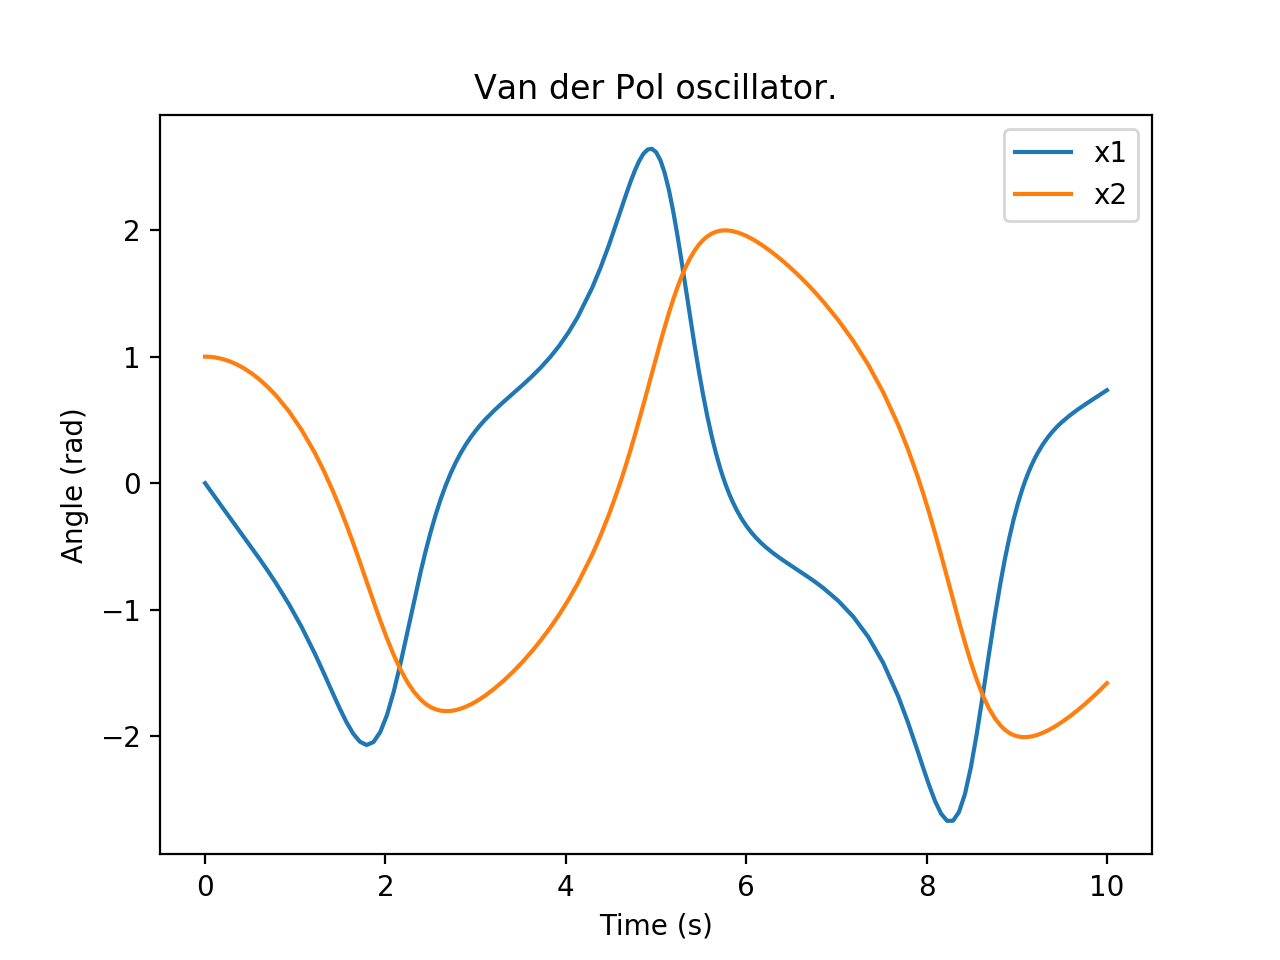

In [4]:
%matplotlib notebook
# Import the plotting library
import matplotlib.pyplot as plt 
x1 = res['x1']
x2 = res['x2']
t = res['time']
plt.figure(1)
plt.plot(t, x1, t, x2)
plt.legend(('x1','x2'))
plt.title('Van der Pol oscillator.')
plt.ylabel('Angle (rad)')
plt.xlabel('Time (s)')
plt.show()